# Linear Regression 


## Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

##  Dataset

You will start by loading the dataset for this task. 
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline
import pandas as pd 

In [3]:
x_train=np.array([6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,14.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891,20.27,5.4901,6.3261,5.5649,18.945,12.828,10.957,13.176,22.203,5.2524,6.5894,9.2482,5.8918,8.2111,7.9334,8.0959,5.6063,12.836,6.3534,5.4069,6.8825,11.708,5.7737,7.8247,7.0931,5.0702,5.8014,11.7,5.5416,7.5402,5.3077,7.4239,7.6031,6.3328,6.3589,6.2742,5.6397,9.3102,9.4536,8.8254,5.1793,21.279,14.908,18.959,7.2182,8.2951,10.236,5.4994,20.341,10.136,7.3345,6.0062,7.2259,5.0269,6.5479,7.5386,5.0365,10.274,5.1077,5.7292,5.1884,6.3557,9.7687,6.5159,8.5172,9.1802,6.002,5.5204,5.0594,5.7077,7.6366,5.8707,5.3054,8.2934,13.394,5.4369])

In [4]:
y_train=np.array([17.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12.0,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386,21.767,4.263,5.1875,3.0825,22.638,13.501,7.0467,14.692,24.147,-1.22,5.9966,12.134,1.8495,6.5426,4.5623,4.1164,3.3928,10.117,5.4974,0.55657,3.9115,5.3854,2.4406,6.7318,1.0463,5.1337,1.844,8.0043,1.0179,6.7504,1.8396,4.2885,4.9981,1.4233,-1.4211,2.4756,4.6042,3.9624,5.4141,5.1694,-0.74279,17.929,12.054,17.054,4.8852,5.7442,7.7754,1.0173,20.992,6.6799,4.0259,1.2784,3.3411,-2.6807,0.29678,3.8845,5.7014,6.7526,2.0576,0.47953,0.20421,0.67861,7.5435,5.3436,4.2415,6.7981,0.92695,0.152,2.8214,1.8451,4.2959,7.2029,1.9869,0.14454,9.0551,0.61705])

In [5]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [6]:
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [7]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


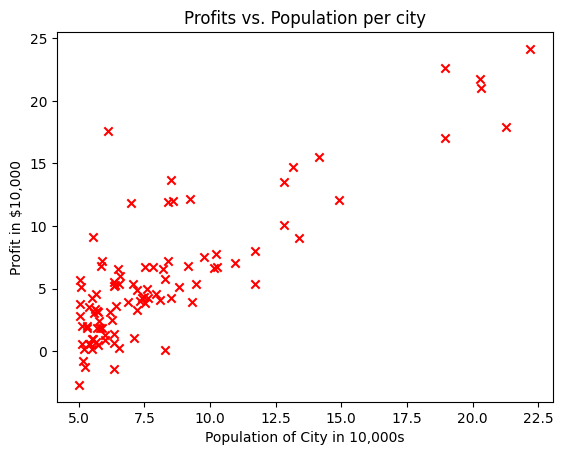

In [8]:
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [9]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 

    total_cost = 0
    

    cost_sum=0
    for i in range(0,m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost
    
    total_cost=(1/(2*m))*cost_sum 

    return total_cost

In [10]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')



<class 'numpy.float64'>
Cost at initial w: 75.203


In [11]:
def compute_gradient(x, y, w, b): 

    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i= (f_wb-y[i])*x[i]
        dj_db_i= f_wb-y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
        
    return dj_dw, dj_db

In [12]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [13]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [14]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history 

In [15]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2000
alpha = 0.01

w,b,j,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)


Iteration    0: Cost     6.74   
Iteration  200: Cost     5.17   
Iteration  400: Cost     4.82   
Iteration  600: Cost     4.64   
Iteration  800: Cost     4.56   
Iteration 1000: Cost     4.52   
Iteration 1200: Cost     4.50   
Iteration 1400: Cost     4.49   
Iteration 1600: Cost     4.48   
Iteration 1800: Cost     4.48   
w,b found by gradient descent: 1.182212774757377 -3.7880685727231103


Text(0, 0.5, 'Cost')

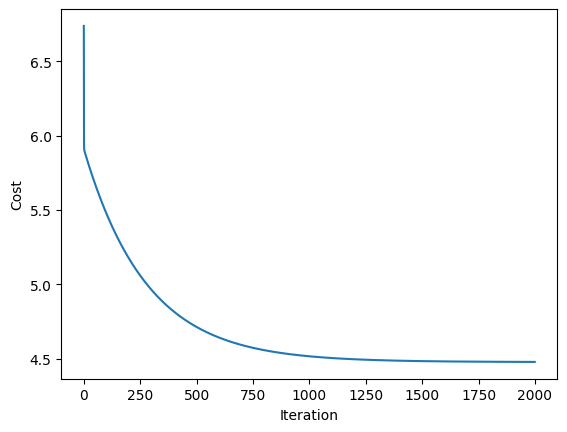

In [16]:
iter=np.arange(2000)
plt.plot(iter,j)
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [67]:
m = x_train.shape[0]
predicted = np.zeros(m)
print(predicted)
for i in range(m):
    predicted[i] = w * x_train[i] + b

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [71]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, predicted)

18.1564561


In [68]:
def mse(x, y, w, b):
    m = len(x)
    cost_sum = 0
    for i in range(0, m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    total_cost = (1 / (m)) * cost_sum
    return total_cost

In [70]:
mse(y_train,predicted,w,b)
# print(x_train)
# print(predicted)

20.81305815693872

Text(0.5, 0, 'Population of City in 10,000s')

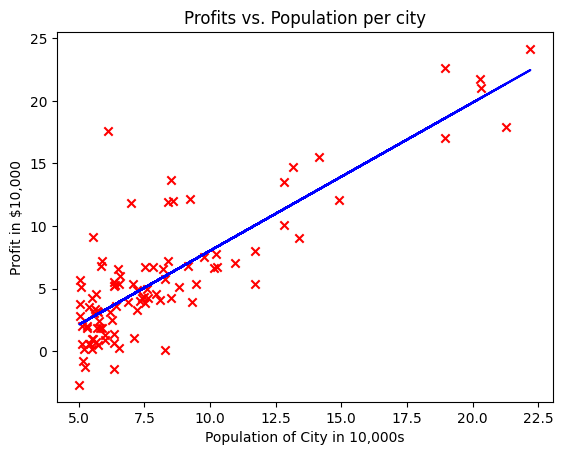

In [19]:
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [20]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $3496.76
For population = 70,000, we predict a profit of $44874.21


# Multiple regression

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [22]:
df=pd.read_csv("Student_Performance.csv")

In [23]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [24]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [25]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [27]:
df.shape

(10000, 6)

In [28]:
df.corr()['Previous Scores']

Hours Studied                      -0.012390
Previous Scores                     1.000000
Extracurricular Activities          0.008369
Sleep Hours                         0.005944
Sample Question Papers Practiced    0.007888
Performance Index                   0.915189
Name: Previous Scores, dtype: float64

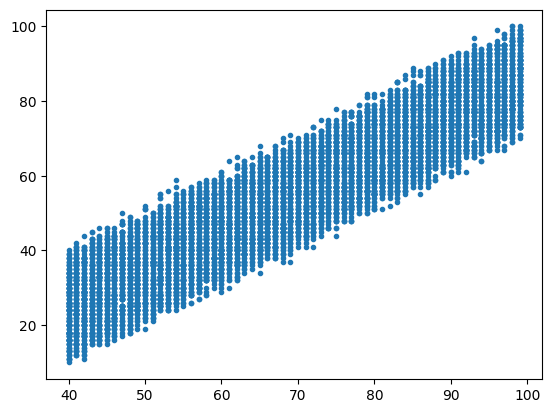

In [29]:
plt.scatter(df['Previous Scores'],df['Performance Index'],marker='.')

In [30]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [31]:
X.shape,y.shape

((10000, 5), (10000,))

In [32]:
X=df.iloc[:,0:5]
y=df.iloc[:,[-1]]

In [33]:
X.shape,y.shape

((10000, 5), (10000, 1))

In [34]:
import numpy as np
class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta0 = 0
        self.theta1 = 0
        self.cost_history = []

    def fit(self, X, y):
        n_samples = len(y)

        for _ in range(self.n_iterations):
            y_predicted = self.predict(X)

            # Compute gradients
            gradient_theta0 = (1 / n_samples) * np.sum(y_predicted - y)
            gradient_theta1 = (1 / n_samples) * np.dot((y_predicted - y), X)

            # Update parameters
            self.theta0 -= self.learning_rate * gradient_theta0
            self.theta1 -= self.learning_rate * gradient_theta1

            # Compute and store cost
            cost = self._compute_cost(X, y)
            self.cost_history.append(cost)

            print(f"Iteration {_+1}, Cost: {cost}")

    def predict(self, X):
        return self.theta0 + self.theta1 * X

    def _compute_cost(self, X, y):
        n_samples = len(y)
        y_predicted = self.predict(X)
        cost = (1 / (2 * n_samples)) * np.dot((y_predicted - y).T, (y_predicted - y))
        return cost
if __name__ == "__main__":
    # Example dataset
    X = np.array([1, 2, 3, 4, 5])
    y = np.array([3, 4, 2, 5, 6])

In [35]:
model = LinearRegressionGD(learning_rate=0.0001, n_iterations=10000)
model.fit(X, y)

Iteration 1, Cost: 8.980455563799998
Iteration 2, Cost: 8.960957328092187
Iteration 3, Cost: 8.941505183622674
Iteration 4, Cost: 8.922099021395942
Iteration 5, Cost: 8.902738732674223
Iteration 6, Cost: 8.883424208976889
Iteration 7, Cost: 8.86415534207984
Iteration 8, Cost: 8.844932024014918
Iteration 9, Cost: 8.825754147069274
Iteration 10, Cost: 8.806621603784784
Iteration 11, Cost: 8.787534286957438
Iteration 12, Cost: 8.76849208963674
Iteration 13, Cost: 8.74949490512511
Iteration 14, Cost: 8.730542626977288
Iteration 15, Cost: 8.711635148999727
Iteration 16, Cost: 8.69277236525002
Iteration 17, Cost: 8.673954170036277
Iteration 18, Cost: 8.655180457916556
Iteration 19, Cost: 8.636451123698256
Iteration 20, Cost: 8.617766062437543
Iteration 21, Cost: 8.599125169438743
Iteration 22, Cost: 8.580528340253778
Iteration 23, Cost: 8.561975470681555
Iteration 24, Cost: 8.543466456767405
Iteration 25, Cost: 8.52500119480248
Iteration 26, Cost: 8.506579581323193
Iteration 27, Cost: 8.4882

In [36]:
print("slope:", model.theta1)
print("Intercept:",model.theta0)

slope: 1.0706228734671996
Intercept: 0.561901841868184


In [37]:
X_test = np.array([8, 9])
predictions = model.predict(X_test)
print("Predictions:", predictions)

Predictions: [ 9.12688483 10.1975077 ]


In [38]:
import matplotlib.pyplot as plt
def plot_cost_history(cost_history, n_iterations):
    plt.plot(range(1, n_iterations + 1), cost_history)
    plt.title('Cost History')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

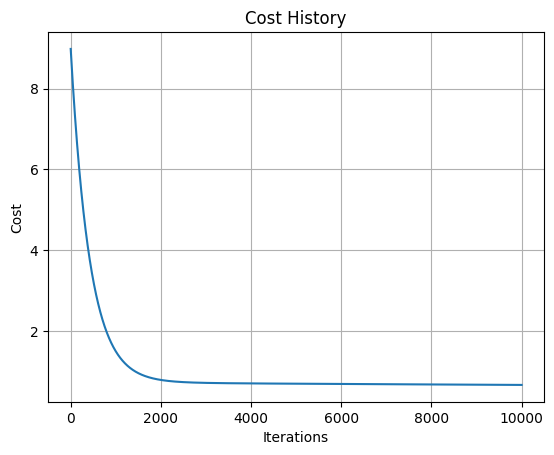

In [39]:
plot_cost_history(model.cost_history, model.n_iterations)

In [53]:
m = X_test.shape[0]
predictions = np.zeros(m)

for i in range(m):
    predictions[i] = w * X_test[i] + b

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X_test, predictions)

5.022585664478636

In [77]:
def MSE(x, y, slope, intercept):
    w=slope
    b=intercept
    m = len(x)
    cost_sum = 0
    for i in range(0, m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    total_cost = (1 / (m)) * cost_sum
    return total_cost

In [76]:
MSE(X_test,predictions,w,b)

2.1766897049655656

# 

In [40]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescent:
    def __init__(self, alpha=0.001, iterations=1000):
        self.alpha = alpha
        self.iterations = iterations
        self.w = None
        self.b = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros((n, 1))
        self.b = 0

        for _ in range(self.iterations):
            # Hypothesis function
            h = np.dot(X, self.w) + self.b
            
            # Calculate gradients
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)

            # Update parameters
            self.w = self.w - self.alpha * dw
            self.b -= self.alpha * db
            
            # Compute and store the cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            print(f"Iteration {_+1}, Cost: {cost}")

    def predict(self, X):
        return np.dot(X, self.w) + self.b
    
    def compute_cost(self, X, y):
        m = len(y)
        h = np.dot(X, self.w) + self.b
        cost = np.sum((h - y) ** 2) / (2 * m)
        return cost
        
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Example features
y = np.array([2, 3, 4, 5])  # Example labels
# Predict
predictions = model.predict(X)

In [41]:
model = GradientDescent(alpha=0.001, iterations=10000)
model.fit(X, y)

Iteration 1, Cost: 25.81947375
Iteration 2, Cost: 24.69544421105719
Iteration 3, Cost: 23.62519914487207
Iteration 4, Cost: 22.60615669873657
Iteration 5, Cost: 21.635859130161865
Iteration 6, Cost: 20.711966833842215
Iteration 7, Cost: 19.832252656376095
Iteration 8, Cost: 18.994596484869277
Iteration 9, Cost: 18.196980096214173
Iteration 10, Cost: 17.43748225447699
Iteration 11, Cost: 16.71427404443062
Iteration 12, Cost: 16.025614429848467
Iteration 13, Cost: 15.369846025723605
Iteration 14, Cost: 14.74539107410063
Iteration 15, Cost: 14.150747613704805
Iteration 16, Cost: 13.584485834027035
Iteration 17, Cost: 13.045244604973469
Iteration 18, Cost: 12.531728173617719
Iteration 19, Cost: 12.042703020001735
Iteration 20, Cost: 11.576994864319973
Iteration 21, Cost: 11.13348581819112
Iteration 22, Cost: 10.711111673073685
Iteration 23, Cost: 10.308859319216493
Iteration 24, Cost: 9.925764288854099
Iteration 25, Cost: 9.560908417660224
Iteration 26, Cost: 9.213417618761312
Iteration 27

In [42]:
print("Optimized weights:", model.w)
print("Optimized bias:", model.b)

Optimized weights: [[ 0.19190755 -0.19012334 -0.57215423 -0.95418512]
 [-0.42028278  0.11992927  0.66014131  1.20035335]]
Optimized bias: 3.084696275904362


In [43]:
def plot_cost_history(cost_history,niterations):
 plt.plot(range(1, model.iterations + 1), model.cost_history)
 plt.xlabel('Iterations')
 plt.ylabel('Cost')
 plt.title('Cost History vs. Number of Iterations')
 plt.grid(True)
 plt.show()

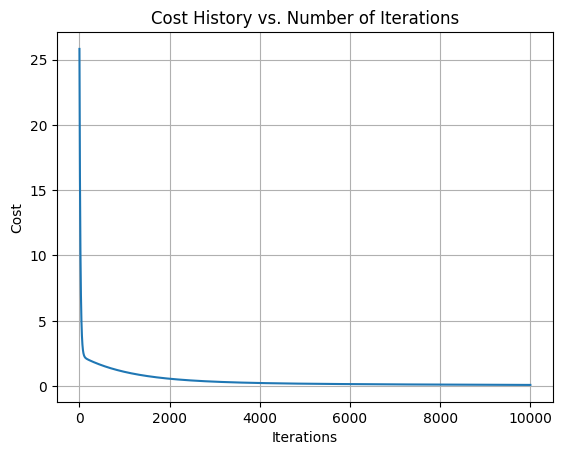

In [44]:
plot_cost_history(model.cost_history, model.iterations)